In [3]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path

# 构建到src目录的路径
src_path = Path('../../src').resolve().as_posix()
# 添加src目录到sys.path
sys.path.append(src_path)


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# 准备数据

def load_data():
    X = np.load(
        "/Users/zhangyufeng/Library/CloudStorage/OneDrive-ThePennsylvaniaStateUniversity/WorkPlace/Personal Project/YNN/data/minst_data/X.npy")
    y = np.load(
        "/Users/zhangyufeng/Library/CloudStorage/OneDrive-ThePennsylvaniaStateUniversity/WorkPlace/Personal Project/YNN/data/minst_data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y


# load dataset
X, y = load_data()


In [5]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),  #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(25, activation="sigmoid", name="layer1"),
        tf.keras.layers.Dense(15, activation="sigmoid", name="layer2"),
        tf.keras.layers.Dense(1, activation="sigmoid", name="layer3"),

    ], name="my_model"
)
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6481
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4581
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.3126
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.2173
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1591
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1228
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0982
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0813
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0683
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0585
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 13/20
32/32 [==============================

In [7]:
prediction = model.predict(X[0].reshape(1, 400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1, 400))  # a one
print(f" predicting a one:  {prediction}")

if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

1/1 [==============================] - 0s 122ms/step
 predicting a zero: [[0.01690824]]
1/1 [==============================] - 0s 59ms/step
 predicting a one:  [[0.98306644]]
prediction after threshold: 1


1/1 [==============================] - 0s 32ms/step


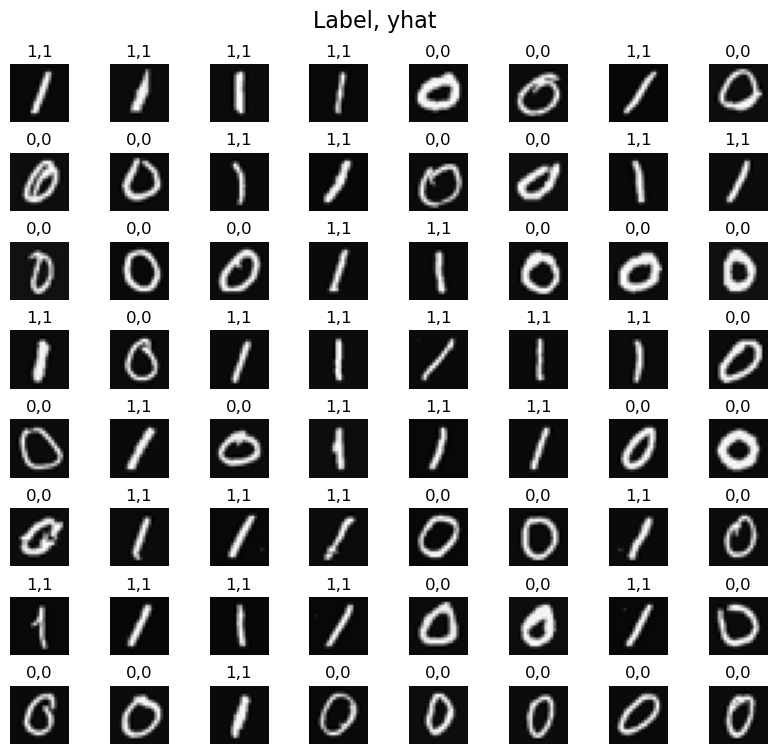

In [8]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1, 400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index, 0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [9]:
#### Examine Weights shapes
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [10]:
# np.save('W1.npy', W1)
# np.save('b1.npy', b1)
# np.save('W2.npy', W2)
# np.save('b2.npy', b2)
# np.save('W3.npy', W3)
# np.save('b3.npy', b3)
# print("Weights and biases are saved successfully.")
